# Logistic regression
Using logistic regression you predict whether a passenger is alive or not.

Inference to be shown:

You have more than one feature here, and If the value of the model predicts 0.79, that would mean a person is 79% alive and 21% dead.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

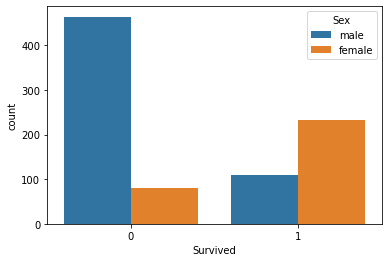

In [5]:
sns.countplot(x="Survived",hue="Sex",data=titanic)

In [6]:
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

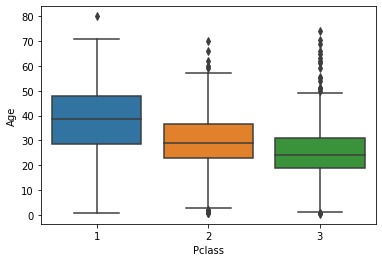

In [7]:
sns.boxplot(x="Pclass",y="Age",data=titanic)

<AxesSubplot:>

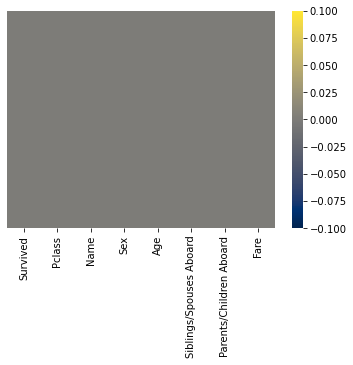

In [12]:
sns.heatmap(titanic.isnull(),yticklabels=False, cmap='cividis')

In [14]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
pcl = pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
titanic=pd.concat([titanic,sex,pcl],axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [18]:
titanic.drop(['Sex','Pclass','Name'],axis=1,inplace=True)

In [20]:
titanic.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


Now we can begin Linear regression

In [21]:
from sklearn.model_selection import train_test_split

In [49]:
x=titanic.drop('Survived', axis=1)
y=titanic["Survived"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression().fit(x_train,y_train)

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
predictions=logmodel.predict(x_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,predictions)

array([[131,  31],
       [ 31,  74]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,predictions)

0.7677902621722846